In [4]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import nltk
nltk.download("stopwords", quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

# Word Cloud
!pip install wordcloud
from wordcloud import WordCloud


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV

# Sentiment Analysis
!pip install textblob
from textblob import TextBlob
import pickle

# Setting up the seaborn style
sns.set(style='whitegrid')


In [5]:
#reading the data
data = pd.read_csv(r'C:\Users\cp756\OneDrive\Desktop\spam.csv', encoding = "latin-1")

# data = data[['v1', 'v2']]
# data = data.rename(columns = {'v1': 'label', 'v2': 'text'})

In [6]:
#checking first few rows
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
#removing unnecessary columns

data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [8]:
#again check first few rows of data
display(data.head(n = 5))

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Lets look  info to see if everything is ok

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# check the statistics of data
data.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
#check the top spam/ham messages

topMessages = data.groupby("message")["class"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,max
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


In [12]:
#add new column to the dataframe data to see the length of every message

data['length'] = data['message'].map(lambda text: len(text))
print (data.head())

  class                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


In [13]:
#check the statistics of the length of the message

data.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

<Axes: ylabel='Frequency'>

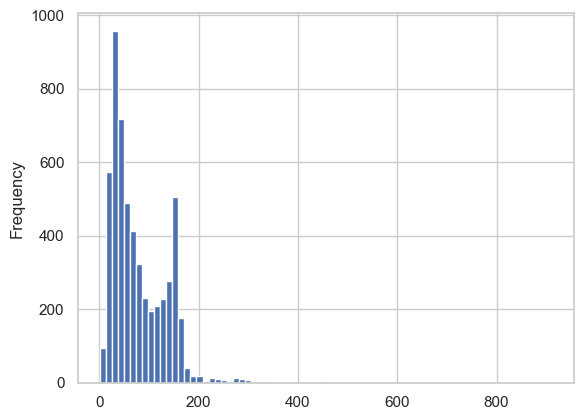

In [14]:
data.length.plot(bins=75, kind='hist')

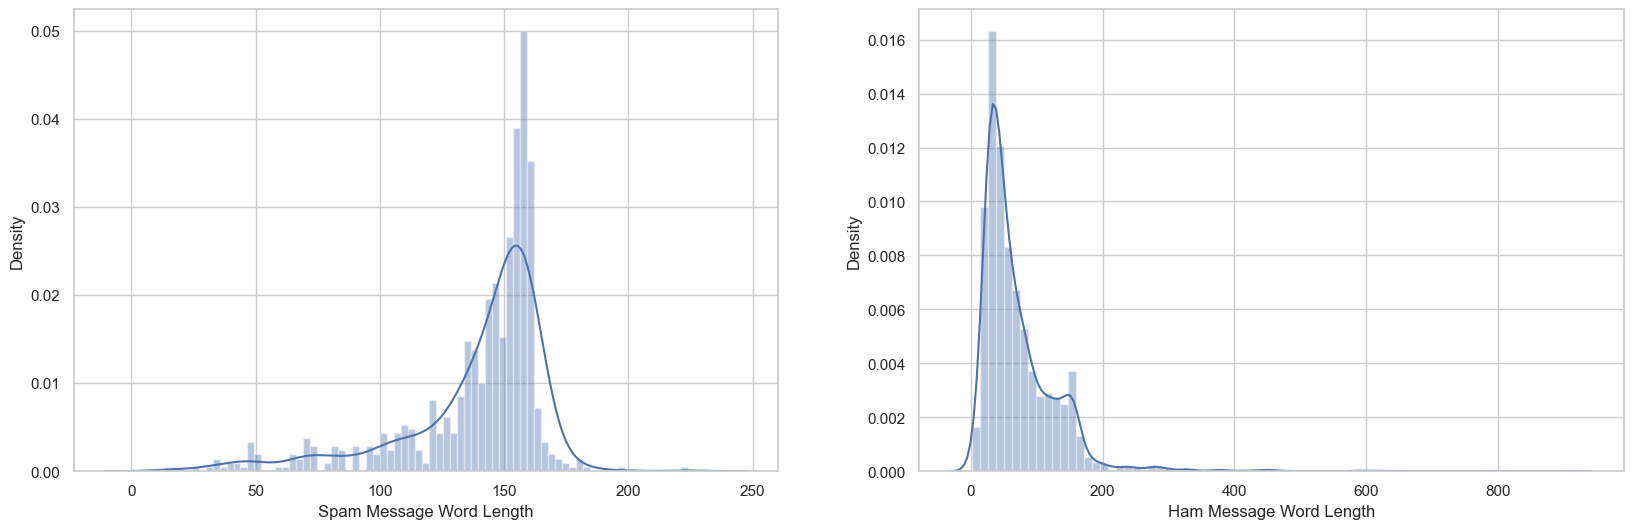

In [15]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(data[data["class"] == "spam"]["length"], bins = 75, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(data[data["class"] == "ham"]["length"], bins = 75, ax = ax[1])
ax[1].set_xlabel("Ham Message Word Length")

plt.show()

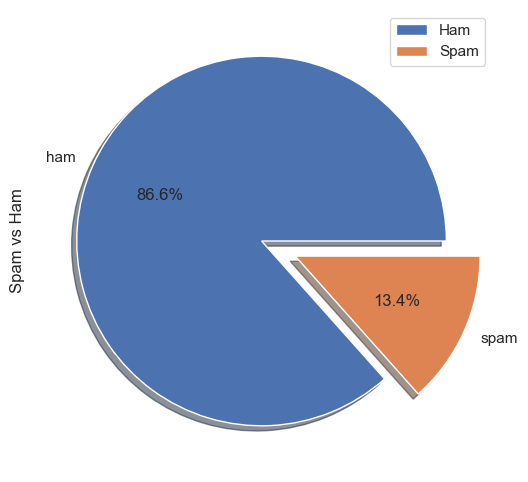

In [16]:
#Check what precentage of our data is spam/ham

data["class"].value_counts().plot(kind = 'pie', explode = [0,0.2], figsize = (8,6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [17]:
#Study individual Spam/ham words

spam_messages = data[data["class"] == "spam"]["message"]
ham_messages = data[data["class"] == "ham"]["message"]

spam_words = []
ham_words = []

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

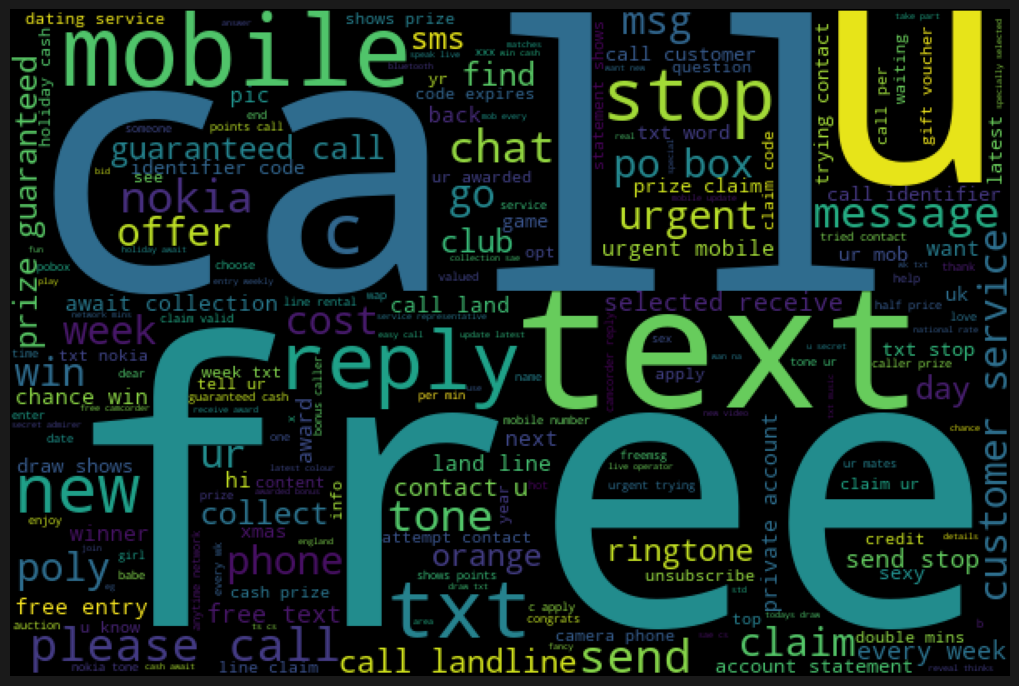

In [18]:


spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

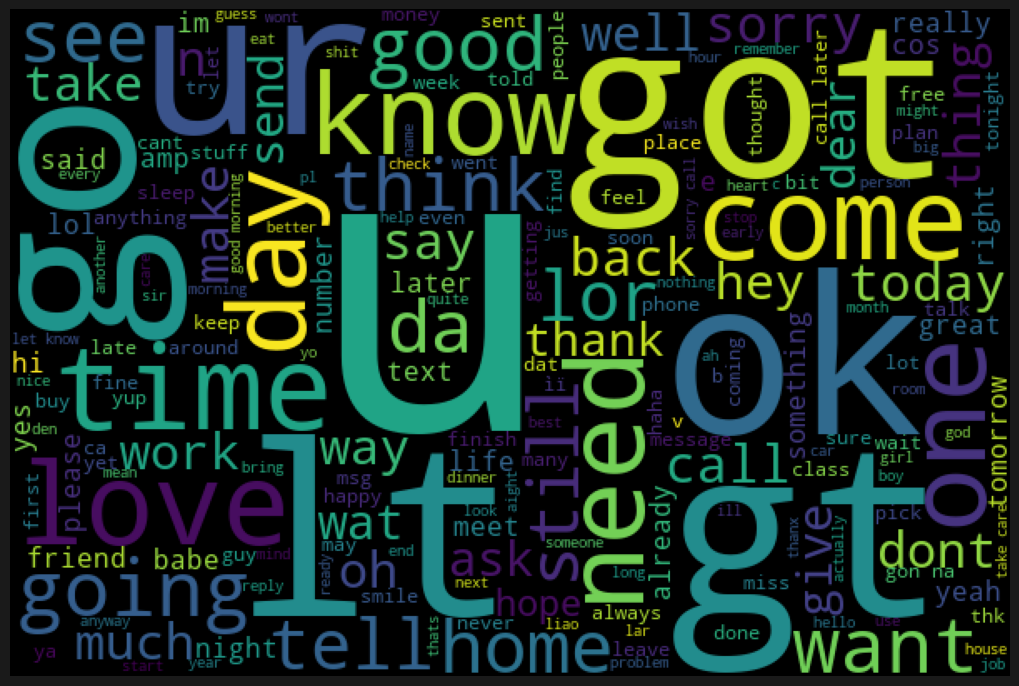

In [19]:


ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [20]:


spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 Spam words are :



call      346
free      219
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
Name: count, dtype: int64

In [21]:
# Top 10 Ham words

ham_words = np.array(ham_words)
print("Top 10 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 Ham words are :



u       989
gt      318
lt      316
get     301
ok      261
go      248
got     242
ur      237
know    236
like    231
Name: count, dtype: int64

In [22]:
def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    
    message = message.lower()
    
    return message

data["message"] = data["message"].apply(cleanText)
data.head(n = 10)    

,class,message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i dont think he goes to usf he lives aroun...,61
5,spam,freemsg hey there darling its been 3 weeks now...,148
6,ham,even my brother is not like to speak with me t...,77
7,ham,as per your request melle melle oru minnaminun...,160
8,spam,winner as a valued network customer you have b...,158
9,spam,had your mobile 11 months or more u r entitled...,154


In [23]:
#specifing features and labels
labels = data['class']
text = data['message']

In [24]:
#splitting data into three sets - train, test and validation

X_train, X_remain, y_train, y_remain = train_test_split(text, labels, stratify = labels, random_state=0, test_size=0.3)

X_test, X_val, y_test, y_val = train_test_split(X_remain,y_remain,stratify = y_remain, random_state = 0, test_size = 0.5)

In [26]:
#check the shape of all three datasets

print("Training Data:",X_train.shape,y_train.shape )

print("Testing Data:", X_test.shape,y_test.shape)

print("Validation Data:", X_val.shape,y_val.shape )

Training Data: (3900,) (3900,)
Testing Data: (836,) (836,)
Validation Data: (836,) (836,)


In [49]:
# create the transform
count_vec = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix.
X_train_counts = count_vec.fit_transform(X_train)
# print(X_train_counts)

#Learn vocabulary and idf from training set.
tf_transformer = TfidfTransformer().fit(X_train_counts)

# Learn vocabulary and idf, return term-document matrix.
X_train_transformed = tf_transformer.transform(X_train_counts)

#test data
X_test_counts = count_vec.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

#converts classes into integer
labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

In [51]:
#label mapping of integer to class
label_mapping = dict(zip(labels.classes_,labels.transform(labels.classes_)))
print(label_mapping)

{'ham': 0, 'spam': 1}


In [53]:
model = MultinomialNB()

clf = model.fit(X_train_transformed,y_train_lables_trf)

predictions = model.predict(X_test_transformed)

In [55]:
#Check accuracy on test data
print('Average accuracy on test set={}'.format(np.mean(predictions == labels.transform(y_test))))

Average accuracy on test set=0.9629186602870813


In [57]:
print ('Accuracy', accuracy_score(labels.transform(y_test), predictions))
print()
results = confusion_matrix(labels.transform(y_test), predictions)
print(results)
print()
print ('Report:')
print (classification_report(labels.transform(y_test), predictions)) 

Accuracy 0.9629186602870813

[[724   0]
 [ 31  81]]

Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       724
           1       1.00      0.72      0.84       112

    accuracy                           0.96       836
   macro avg       0.98      0.86      0.91       836
weighted avg       0.96      0.96      0.96       836



In [59]:
from sklearn.metrics import fbeta_score

fbeta_score(labels.transform(y_test), predictions,beta=0.5)


0.9288990825688074